# ***MODEL 1***

# **K-MEANS CLUSTERING LUWU, LUWU TIMUR, LUWU UTARA**

In [175]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [176]:
# Mengimpor dataset
dataset = pd.read_csv('DATA2.csv')
dataset

,STASIUN,JAN,FEBRUARI,MAR,APR,MEI,JUN,JUL,AGS,SEP,OCT,NOV,DES
0,BPP. BAJO,130,137,210,240,197,198,215,119,62,182,210,202
1,BASTEM/BUA,197,184,231,332,210,191,153,87,78,149,185,248
2,BATUSITANDUK/LAMASI,295,259,347,415,381,283,234,168,184,199,262,340
3,BB. SEPONG / BELOPA UTARA,102,132,206,253,221,204,212,114,93,106,173,112
4,BELOPA,110,118,205,249,260,231,227,100,86,120,170,158
5,BPP. TOMBANG/IP3 KARETAN/WALENRANG,233,227,355,421,363,332,255,198,163,257,294,237
6,LAROMPONG,137,137,176,261,271,284,261,170,110,120,132,120
7,LAROMPONG SELATAN,147,145,178,294,396,359,314,197,186,164,187,106
8,PADANG SAPPA,113,162,253,271,212,192,187,116,72,119,176,141
9,SINGKALA / LAMASI TIMUR,177,215,277,443,413,308,215,111,148,134,197,156


In [177]:
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].values
X

array([[130, 137, 210, 240, 197, 198, 215, 119,  62, 182, 210, 202],
       [197, 184, 231, 332, 210, 191, 153,  87,  78, 149, 185, 248],
       [295, 259, 347, 415, 381, 283, 234, 168, 184, 199, 262, 340],
       [102, 132, 206, 253, 221, 204, 212, 114,  93, 106, 173, 112],
       [110, 118, 205, 249, 260, 231, 227, 100,  86, 120, 170, 158],
       [233, 227, 355, 421, 363, 332, 255, 198, 163, 257, 294, 237],
       [137, 137, 176, 261, 271, 284, 261, 170, 110, 120, 132, 120],
       [147, 145, 178, 294, 396, 359, 314, 197, 186, 164, 187, 106],
       [113, 162, 253, 271, 212, 192, 187, 116,  72, 119, 176, 141],
       [177, 215, 277, 443, 413, 308, 215, 111, 148, 134, 197, 156],
       [100, 112, 185, 256, 247, 222, 210, 120, 100,  96, 125, 104],
       [246, 274, 354, 351, 302, 224, 206, 175, 165, 147, 223, 251],
       [231, 290, 344, 360, 276, 205, 168, 168, 118, 117, 193, 288],
       [271, 283, 306, 376, 329, 321, 203, 150, 115, 164, 211, 280],
       [241, 269, 360, 390, 308, 2

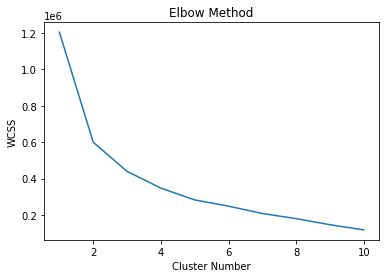

In [178]:
# Optimasi K-Means dengan metode elbow untuk menentukan jumlah klaster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [179]:
# Proses K-Means Clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [180]:
kmeans
y_kmeans

array([0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2], dtype=int32)

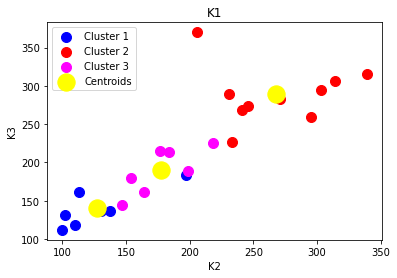

In [181]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K1')
plt.xlabel('K2')
plt.ylabel('K3')
plt.legend()

In [182]:
km=kmeans
km

KMeans(n_clusters=3, random_state=42)

In [183]:
y_predict = km.fit_predict(dataset[['JAN', 'FEBRUARI', 'MAR', 'APR', 'MEI', 'JUN', 'JUL', 'AGS', 'SEP', 'OCT', 'NOV', 'DES']])
y_predict

array([0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2], dtype=int32)

In [214]:
dataset['cluster'] = y_predict
dataset.head

<bound method NDFrame.head of                                STASIUN  JAN  FEBRUARI  MAR  APR  MEI  JUN  \
0                            BPP. BAJO  130  0.125523  210  240  197  198   
1                           BASTEM/BUA  197  0.405858  231  332  210  191   
2                  BATUSITANDUK/LAMASI  295  0.815900  347  415  381  283   
3            BB. SEPONG / BELOPA UTARA  102  0.008368  206  253  221  204   
4                               BELOPA  110  0.041841  205  249  260  231   
5   BPP. TOMBANG/IP3 KARETAN/WALENRANG  233  0.556485  355  421  363  332   
6                            LAROMPONG  137  0.154812  176  261  271  284   
7                    LAROMPONG SELATAN  147  0.196653  178  294  396  359   
8                         PADANG SAPPA  113  0.054393  253  271  212  192   
9              SINGKALA / LAMASI TIMUR  177  0.322176  277  443  413  308   
10                                SULI  100  0.000000  185  256  247  222   
11                             ANGKONA  246  0

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[['JAN','FEBRUARI','MAR','APR','MEI','JUN','JUL','AGS','SEP','OCT','NOV','DES']])
dataset['FEBRUARI'] = scaler.transform(dataset[['JAN', 'FEBRUARI', 'MAR', 'APR', 'MEI', 'JUN', 'JUL', 'AGS', 'SEP', 'OCT', 'NOV', 'DES']])
dataset

,STASIUN,JAN,FEBRUARI,MAR,APR,MEI,JUN,JUL,AGS,SEP,OCT,NOV,DES,cluter
0,BPP. BAJO,130,0.125523,210,240,197,198,215,119,62,182,210,202,0
1,BASTEM/BUA,197,0.405858,231,332,210,191,153,87,78,149,185,248,0
2,BATUSITANDUK/LAMASI,295,0.815900,347,415,381,283,234,168,184,199,262,340,1
3,BB. SEPONG / BELOPA UTARA,102,0.008368,206,253,221,204,212,114,93,106,173,112,0
4,BELOPA,110,0.041841,205,249,260,231,227,100,86,120,170,158,0
5,BPP. TOMBANG/IP3 KARETAN/WALENRANG,233,0.556485,355,421,363,332,255,198,163,257,294,237,1
6,LAROMPONG,137,0.154812,176,261,271,284,261,170,110,120,132,120,0
7,LAROMPONG SELATAN,147,0.196653,178,294,396,359,314,197,186,164,187,106,2
8,PADANG SAPPA,113,0.054393,253,271,212,192,187,116,72,119,176,141,0
9,SINGKALA / LAMASI TIMUR,177,0.322176,277,443,413,308,215,111,148,134,197,156,2


# ***MODEL 2***

# **HIERARCHICAL CLUSTERING LUWU, LUWU TIMUR, LUWU UTARA**

In [197]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [198]:
# Mengimpor dataset
dataset1 = pd.read_csv('DATA2.csv')
dataset1

,STASIUN,JAN,FEBRUARI,MAR,APR,MEI,JUN,JUL,AGS,SEP,OCT,NOV,DES
0,BPP. BAJO,130,137,210,240,197,198,215,119,62,182,210,202
1,BASTEM/BUA,197,184,231,332,210,191,153,87,78,149,185,248
2,BATUSITANDUK/LAMASI,295,259,347,415,381,283,234,168,184,199,262,340
3,BB. SEPONG / BELOPA UTARA,102,132,206,253,221,204,212,114,93,106,173,112
4,BELOPA,110,118,205,249,260,231,227,100,86,120,170,158
5,BPP. TOMBANG/IP3 KARETAN/WALENRANG,233,227,355,421,363,332,255,198,163,257,294,237
6,LAROMPONG,137,137,176,261,271,284,261,170,110,120,132,120
7,LAROMPONG SELATAN,147,145,178,294,396,359,314,197,186,164,187,106
8,PADANG SAPPA,113,162,253,271,212,192,187,116,72,119,176,141
9,SINGKALA / LAMASI TIMUR,177,215,277,443,413,308,215,111,148,134,197,156


In [ ]:
dataset2 = 

In [199]:
X = dataset1.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].values
X

array([[130, 137, 210, 240, 197, 198, 215, 119,  62, 182, 210, 202],
       [197, 184, 231, 332, 210, 191, 153,  87,  78, 149, 185, 248],
       [295, 259, 347, 415, 381, 283, 234, 168, 184, 199, 262, 340],
       [102, 132, 206, 253, 221, 204, 212, 114,  93, 106, 173, 112],
       [110, 118, 205, 249, 260, 231, 227, 100,  86, 120, 170, 158],
       [233, 227, 355, 421, 363, 332, 255, 198, 163, 257, 294, 237],
       [137, 137, 176, 261, 271, 284, 261, 170, 110, 120, 132, 120],
       [147, 145, 178, 294, 396, 359, 314, 197, 186, 164, 187, 106],
       [113, 162, 253, 271, 212, 192, 187, 116,  72, 119, 176, 141],
       [177, 215, 277, 443, 413, 308, 215, 111, 148, 134, 197, 156],
       [100, 112, 185, 256, 247, 222, 210, 120, 100,  96, 125, 104],
       [246, 274, 354, 351, 302, 224, 206, 175, 165, 147, 223, 251],
       [231, 290, 344, 360, 276, 205, 168, 168, 118, 117, 193, 288],
       [271, 283, 306, 376, 329, 321, 203, 150, 115, 164, 211, 280],
       [241, 269, 360, 390, 308, 2

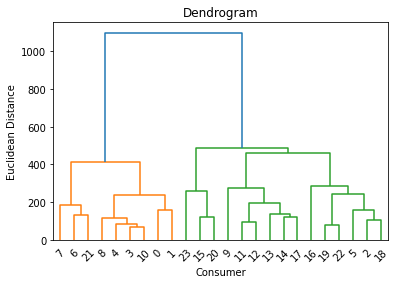

In [200]:
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

In [201]:
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

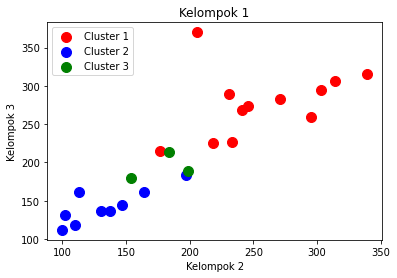

In [202]:
# Visualisasi hasil clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Kelompok 1')
plt.xlabel('Kelompok 2')
plt.ylabel('Kelompok 3')
plt.legend()
plt.show()

In [208]:
# Perform the actual clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [210]:
y_hc = hc.fit_predict(X)

<function matplotlib.pyplot.scatter>

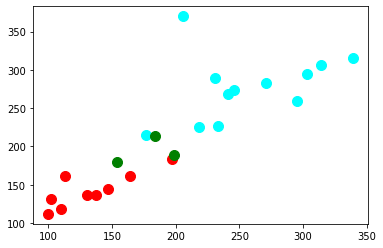

In [212]:
plt.scatter(X[y_hc==0,0], X[y_hc == 0,1], s=100, c='cyan')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='red')
plt.scatter(X[y_hc==2,0], X[y_hc == 2,1], s=100, c='green')

plt.scatter

In [213]:
dataset1['cluter'] = y_predict
dataset1.head

<bound method NDFrame.head of                                STASIUN  JAN  FEBRUARI  MAR  APR  MEI  JUN  \
0                            BPP. BAJO  130       137  210  240  197  198   
1                           BASTEM/BUA  197       184  231  332  210  191   
2                  BATUSITANDUK/LAMASI  295       259  347  415  381  283   
3            BB. SEPONG / BELOPA UTARA  102       132  206  253  221  204   
4                               BELOPA  110       118  205  249  260  231   
5   BPP. TOMBANG/IP3 KARETAN/WALENRANG  233       227  355  421  363  332   
6                            LAROMPONG  137       137  176  261  271  284   
7                    LAROMPONG SELATAN  147       145  178  294  396  359   
8                         PADANG SAPPA  113       162  253  271  212  192   
9              SINGKALA / LAMASI TIMUR  177       215  277  443  413  308   
10                                SULI  100       112  185  256  247  222   
11                             ANGKONA  246   